## Solving Travelling Salesmen Problem using Simulated Annealing

In [1]:
import numpy as np
import random
import copy

### Helper Functions

In [2]:
# Helper Functions (run)
def get_order(minimization):
    if minimization:
        return 1
    else:
        return -1

def adjust_costMatrix(cost_matrix, minimization):
    order = get_order(minimization)
    const = order * np.inf
    for i in range(len(cost_matrix)):
        cost_matrix[i][i] = const
    return cost_matrix

def generateInitialSoln(cost_matrix, minimization, method='Random'):
    initSoln = []
    if method == 'Random':
        cities = list(range(len(cost_matrix)))
        for i in range(len(cities)):
            randomCity = np.random.choice(cities)
            initSoln.append(randomCity)
            cities.remove(randomCity)
        return initSoln
    
    if method == 'Greedy Search': # incomplete
        order = get_order(minimization)
        cities = list(range(len(cost_matrix)))
        startingNode = np.random.choice(cities)
        initSoln.append(startingNode)
        currNode = startingNode
        for i in range(len(cities)):
            np.array(cost_matrix[currNode]).argsort()[::order]
        return initSoln

def routeCost(cost_matrix, solution):
    routeCost = 0
    for i in range(len(solution)):
        routeCost += cost_matrix[solution[i-1]][solution[i]]
    return routeCost

def newSolution(solution, cost_matrix, minimization, method='Insertion'):
    positions = list(range(len(solution)))
    randomNode = np.random.choice(positions)
    positions.remove(randomNode)

    nbs = [] # neighbors
    RC = []  # route costs
    for ps in positions:
        neighbor = copy.deepcopy(solution)
        neighbor.remove(solution[randomNode])
        neighbor.insert(ps, solution[randomNode])
        nbs.append(neighbor)
        RC.append(routeCost(cost_matrix, neighbor))

    order = get_order(minimization)
    sortedInds = np.array(RC).argsort()[::order]
    return nbs[sortedInds[0]]

def acceptanceFunction(Temp, costDiff):
    if costDiff < 0:
        return True
    else:
        r = random.random()
        if r < np.exp(-costDiff/Temp):
            return True
        else:
            return False

def stoppingCriterion(Temp, minTemp, iterCount, maxIteration):
    if Temp <= minTemp or iterCount == maxIteration:
        return False
    else:
        return True
    
def optimalSoln(solution, nodeLabels, startingNode):
    optSoln = []
    ind = np.where(np.array(solution) == startingNode)[0][0]
    for i in range(ind, len(solution)):
        optSoln.append(i)
    for i in range(ind):
        optSoln.append(i)
    optimal_ind = [solution[i] for i in optSoln]
    optimal_ind.append(optimal_ind[0])
    return [nodeLabels[k] for k in optimal_ind]

In [3]:
# Main SA Function
def simulatedAnnealing(cost_matrix, nodeLabels, minimization, maxIteration):
    cost_matrix = adjust_costMatrix(cost_matrix, minimization)

    # Simulated Annealing Parameters
    Temp = 100  # maximum temperature
    alph = 0.9  # cooling rate of temp
    minTemp = 1
    print(f'Current Temp: {Temp} \n')

    # Initial Solution
    initSoln = generateInitialSoln(cost_matrix, minimization)
    print(f'Initial Solution: {initSoln} \n Route Cost = {routeCost(cost_matrix, initSoln)} \n')
    incumbentSoln = initSoln

    # ------------------ Implementation
    iterCount = 0
    continueIter = True
    costs = []

    while continueIter:
        print(f'Iteration {iterCount} -------------- \n')

        # cost of current incumbent solution
        prevCost = routeCost(cost_matrix, incumbentSoln)
        costs.append(prevCost)

        # generate new solution (Insertion)
        neighbor = newSolution(incumbentSoln, cost_matrix, minimization, method='Insertion')
        nbCost = routeCost(cost_matrix, neighbor)
        costDiff = nbCost - prevCost
        acceptSoln = acceptanceFunction(Temp, costDiff)
        if acceptSoln:
            incumbentSoln = neighbor
        print(f'Neighbor: {neighbor} \n Route Cost = {nbCost} \n Accept = {acceptSoln} \n')

        print(f'Incumbent Solution: {incumbentSoln} \n Route Cost = {routeCost(cost_matrix, incumbentSoln)} \n')
        # update temp
        Temp = Temp * alph
        print(f'Current Temp: {Temp} \n')

        # stopping criterion
        continueIter = stoppingCriterion(Temp, minTemp, iterCount, maxIteration)
        iterCount += 1

    print('--------------------------------------------')
    print(f'After {iterCount} iteration(s), optimal solution is {incumbentSoln} \n Route Cost = {routeCost(cost_matrix, incumbentSoln)} \n')

    print(f'That is, optimal solution is the path \n {optimalSoln(incumbentSoln, nodeLabels, startingNode=0)}')

    return costs


### Parameters

In [4]:
# SA Implementation
cost_matrix = [
    [0, 19, 14, 11, 23, 24],
    [24, 0, 12, 30, 30, 19],
    [40, 42, 0, 20, 36, 15],
    [20, 35, 37, 0, 45, 33],
    [15, 26, 18, 25, 0, 30],
    [22, 17, 14, 30, 28, 0]
]
nodeLabels = ["A", "B", "C", "D", "E", "F"]
cost_limit = np.inf  # no limit in route cost
minimization = True
maxIteration = 50

costs = simulatedAnnealing(cost_matrix, nodeLabels, minimization, maxIteration)

Current Temp: 100 

Initial Solution: [0, 3, 2, 5, 1, 4] 
 Route Cost = 125 

Iteration 0 -------------- 

Neighbor: [0, 3, 5, 1, 2, 4] 
 Route Cost = 124 
 Accept = True 

Incumbent Solution: [0, 3, 5, 1, 2, 4] 
 Route Cost = 124 

Current Temp: 90.0 

Iteration 1 -------------- 

Neighbor: [0, 3, 1, 2, 5, 4] 
 Route Cost = 116 
 Accept = True 

Incumbent Solution: [0, 3, 1, 2, 5, 4] 
 Route Cost = 116 

Current Temp: 81.0 

Iteration 2 -------------- 

Neighbor: [3, 1, 2, 5, 4, 0] 
 Route Cost = 116 
 Accept = True 

Incumbent Solution: [3, 1, 2, 5, 4, 0] 
 Route Cost = 116 

Current Temp: 72.9 

Iteration 3 -------------- 

Neighbor: [3, 4, 1, 2, 5, 0] 
 Route Cost = 131 
 Accept = False 

Incumbent Solution: [3, 1, 2, 5, 4, 0] 
 Route Cost = 116 

Current Temp: 65.61000000000001 

Iteration 4 -------------- 

Neighbor: [1, 2, 5, 4, 0, 3] 
 Route Cost = 116 
 Accept = True 

Incumbent Solution: [1, 2, 5, 4, 0, 3] 
 Route Cost = 116 

Current Temp: 59.049000000000014 

Iteration 5 --

### Plotting Route Costs

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotCosts(costs):
    plt.figure(1, figsize=(6,4))
    plt.plot(np.arange(len(costs)), costs, 'k-', label='approx line')
    plt.scatter(np.arange(len(costs)), costs, color='r', label="travel distance")
    plt.ylabel('Travel Distance')
    plt.xlabel('Solution $i$')
    plt.legend()
    sns.despine()
    plt.show()

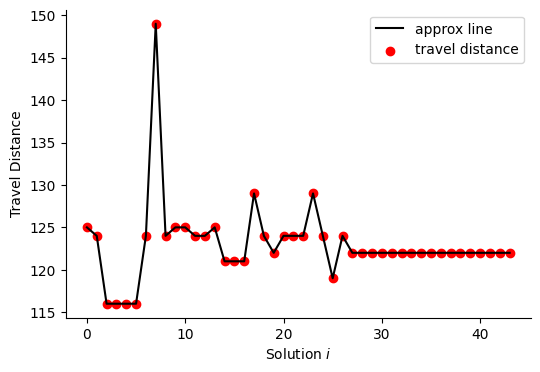

In [8]:
plotCosts(costs)

### Defined Neighborhood

In [8]:
solution = [2, 3, 1, 0, 4, 5]
positions = list(range(len(solution)))
randomNode = np.random.choice(positions)

# avoids swapping
if randomNode == positions[-1]:
    rnp1 = 0  # randomNode+1
else:
    rnp1 = randomNode+1
for nd in [randomNode, randomNode-1, rnp1]:
    positions.remove(positions[nd])

nbs = [] # neighbors
RC = []  # route costs
for ps in positions:
    neighbor = copy.deepcopy(solution)
    neighbor.remove(solution[randomNode])
    neighbor.insert(ps, solution[randomNode])
    nbs.append(neighbor)
    RC.append(routeCost(cost_matrix, neighbor))


order = get_order(minimization)
sortedInds = np.array(RC).argsort()[::order]

solution, randomNode, positions, nbs, RC, nbs[sortedInds[0]]

([2, 3, 1, 0, 4, 5],
 0,
 [1, 3, 4],
 [[3, 2, 1, 0, 4, 5], [3, 1, 0, 2, 4, 5], [3, 1, 0, 4, 2, 5]],
 [186, 169, 145],
 [3, 1, 0, 4, 2, 5])

### Greedy Search Initial Soln

In [10]:
order = get_order(minimization)
cities = list(range(len(cost_matrix)))
startingNode = 0
initSoln.append(startingNode)
currNode = startingNode
for i in range(len(cities)):
    currCosts = cost_matrix[currNode]
    currCosts.remove(cost_matrix[currNode][currNode])
    bestInd = np.array(currCosts).argsort()[::order][0]
    initSoln.append(bestInd)
    

[5 3 4 0 1 2]
[5 3 4 0 1 2]
[5 3 4 0 1 2]
[5 3 4 0 1 2]
[5 3 4 0 1 2]
[5 3 4 0 1 2]


In [20]:
np.array(cost_matrix[0]).argsort(), cost_matrix[0][0]

(array([3, 2, 1, 4, 5, 0], dtype=int64), inf)